## Word Embeddings

**Word Embeddings transform text into a sequence of vectors.**

### Objectives:

* Introduction:

* Understand the concepts in word embeddings

* Use a pretrained word2vec model (SpaCy)

* Train a word2vec model on your own corpus (gensim)

* Visualize the results using PCA

*prerequisites: spacy, gensim*

---

## Introduction

* **Word vectors** are dense representations of words (in contrast to a huge sparse binary matrix), that allows to feed text into neural networks.

    - A **Word embedding** is the transformation of all input words into word vectors. 
    
**This approach is also referred to as Word2Vec.**

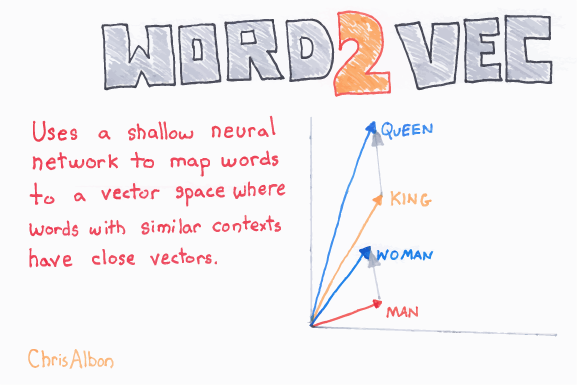

* What: Word embeddings are dense representations of words in a low-dimensional vector space. Embeddings translate discrete variables (words/phrases) to continuous vectors. Word embedding models (Genism / Glove) are to NLP as VGGNET is to image recognition; a pre-trained model, ready for use out the box.


* Why: three main uses for word embeddings:

    1. Finding nearest neighbors in the embedding space. These can be used to find similarities in terms, make recommendations based on user interests, cluster categories etc.

    2. For visualization of concepts and relations between categories.

    3. As input to a machine learning model for a supervised task.

* How: Optimize a supervised learning problem (neural word embedding), then use the weights of the activation layer vector as the word embedding representation of a particular word.

see ` Efficient Estimation of Word Representations in Vector Space by Mikolov et al.,2013` for more information

---

### Understand the concepts

Check out the `Tensorflow embedding projector` <http://projector.tensorflow.org/> to see a dimensionality reduced representation of the similarity between words

### The task:
* Predict context

![title](cbow_vs_skipg.png)

#### Input to the model:
* Tokenize text
    * Split your corpus
    * Enumerate through the set of words
    * Create a word dictionary and an id dictionary
    * Also works with CountVectorizer's vocabulary_ attribute

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
c = CountVectorizer()

In [4]:
corpus = ['The cat sat on the mat',
         'She sells sea shells on the sea shore',
         'Backstreets back alright',
         'The sun is shining']

In [5]:
vec_corpus = c.fit_transform(corpus)

In [7]:
vec_corpus.todense()

matrix([[0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2],
        [0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [9]:
c.vocabulary_

{'the': 15,
 'cat': 3,
 'sat': 7,
 'on': 6,
 'mat': 5,
 'she': 10,
 'sells': 9,
 'sea': 8,
 'shells': 11,
 'shore': 13,
 'backstreets': 2,
 'back': 1,
 'alright': 0,
 'sun': 14,
 'is': 4,
 'shining': 12}

In [10]:
df = pd.DataFrame(vec_corpus.todense(), columns = list(sorted(c.vocabulary_)))
df

,alright,back,backstreets,cat,is,mat,on,sat,sea,sells,she,shells,shining,shore,sun,the
0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,1,0,2,1,1,1,0,1,0,1
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1


### The model

![title](skip_nn.png)

## CBOW - Continuous Bag of Words

### Output from the model:

* A vectorized representation of the predictor word

* Lets see a pretrained model's implementation
    

---

### Use a pretrained word2vec model (spacy)

In [12]:
corpus.append('US political parties can succeed')

In [14]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [19]:
doc = nlp(corpus[-1])

In [20]:
doc

US political parties can succeed

In [22]:
political = doc[1]
parties = doc[2]
succeed = doc[4]

In [23]:
political.vector.shape

(96,)

In [24]:
print(political.similarity(parties))
print(political.similarity(succeed))

0.09397331
-0.11618046


/Users/maximcondon/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/Users/maximcondon/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word

---

### Train a word2vec model on your own corpus (gensim)

In [72]:
from gensim.models import Word2Vec

In [27]:
new_corpus = [each.lower().split() for each in corpus]
new_corpus

[['the', 'cat', 'sat', 'on', 'the', 'mat'],
 ['she', 'sells', 'sea', 'shells', 'on', 'the', 'sea', 'shore'],
 ['backstreets', 'back', 'alright'],
 ['the', 'sun', 'is', 'shining'],
 ['us', 'political', 'parties', 'can', 'succeed']]

In [28]:
model = Word2Vec(new_corpus, min_count=1, size=len(corpus), window=3)

- size : int, optional - Dimensionality of the word vectors.
- window : int, optional - Maximum distance between the current and predicted word within a sentence.
- min_count : int, optional - Ignores all words with total frequency lower than this.

In [32]:
words = list(model.wv.vocab)

In [33]:
words

['the',
 'cat',
 'sat',
 'on',
 'mat',
 'she',
 'sells',
 'sea',
 'shells',
 'shore',
 'backstreets',
 'back',
 'alright',
 'sun',
 'is',
 'shining',
 'us',
 'political',
 'parties',
 'can',
 'succeed']

In [34]:
type(model.wv.vocab)

dict

---

### And visualise the results

Going to perform dimensionality reduction with PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2) # 2 dimensions

X = model[model.wv.vocab]
print(X.shape)

(21, 5)


/Users/maximcondon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
new_x = pca.fit_transform(X)

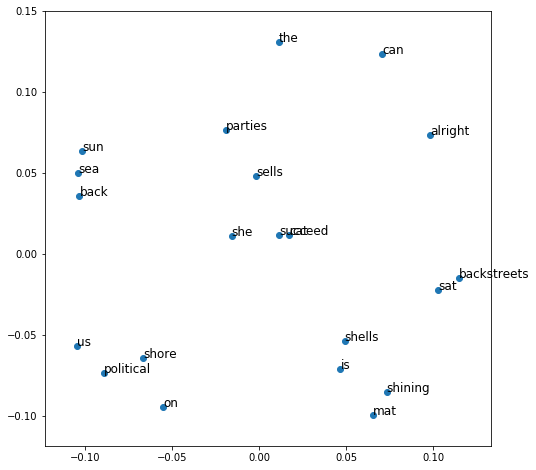

In [38]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
plt.scatter(new_x[:,0], new_x[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, fontsize=12, xy=(new_x[i,0], new_x[i, 1]))
plt.show()

## Skip-Grams

**Skip-grams** are simply pairs of words that are 1 or more words apart. Skip grams are frequently used to calculate word embeddings:

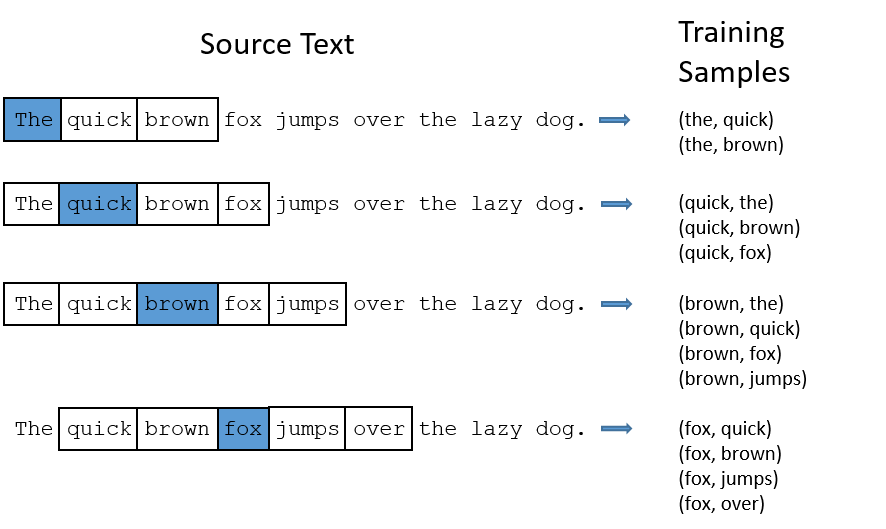

1. Tokenizing the data follows the same principles as in a Bag-of-words. To represent spatial relationships between words.
2. Consider words and their context by generating pairs of words up to N words apart.
3. Count the co-occurence of words X (a huge sparse matrix)
4. Optimize a loss function for the word vectors w over words i and j

\begin{align}
J \approx \sum_{ij}(w_i^T w_j - log X_{ij})^2
\end{align}

### Pretrained embeddings

- Because calculating a word embedding from scratch is costly (millions of tokens, 1 million parameters and more), it is often useful to start with pretrained word vectors. The two systems most frequently used are **GenSim** and **GloVe**.

### Embedding Layers
An embedding layer transforms one-hot encoded input (usually with a huge number of dimensions) to much fewer dimensions, e.g. representing a word as a 50 or 200-dimensional vector.

There are plenty of uses and architectures for Word Embeddings. The majority of these have an Embedding Layer either as the first layer (to understand text) or as the last layer (to produce text).

Here is a typical architecture

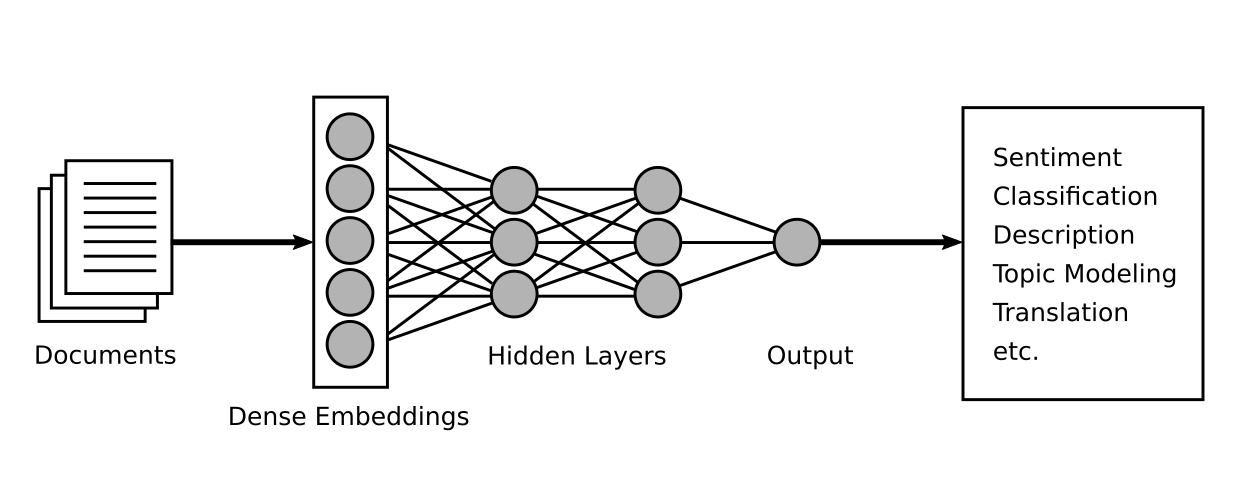
To condense the information in a longer text sequence, you can use one or more **1D convolutional layers**.


## Cosine Similarity
- You can compare word vectors using the cosine similarity:

In [19]:
import numpy as np

def cosine_similarity(a, b):
    """Returns cosine similarity of two word vectors"""
    return a.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [47]:
model = Word2Vec(new_corpus, min_count=1, size=len(corpus), window=3)

In [64]:
sea = model.wv['sea']
sea

array([ 0.08907603, -0.05653713, -0.01306491, -0.09036548,  0.00158615],
      dtype=float32)

In [65]:
shells = model.wv['shells']
shells

array([-0.07308082, -0.0746229 ,  0.08016061,  0.03841601, -0.0146901 ],
      dtype=float32)

In [66]:
cosine_similarity(sea, shells)

-0.35500664

### Embeddings for other types of data
- Embeddings can be used for other types of sparse data as well, e.g. to build recommender systems (see the parallel to NMF).

## Examples

### Create GenSim Vectors


In [73]:
from gensim.models import word2vec

corpus = [
   "She loves you yeah yeah yeah",
   "see you later alligator",
   "see you later crocodile",
   "i just call to say i love you",
   "and it seems to me you lived your life like a candle in the wind",
   "baby you can drive my car",
   "we all live in the yellow submarine"
]

In [75]:
tokenised = [s.lower().split() for s in corpus]

wv = word2vec.Word2Vec(tokenised, size=7, window=5, min_count=1)
words = list(wv.wv.vocab)
len(words)

37

In [76]:
words

['she',
 'loves',
 'you',
 'yeah',
 'see',
 'later',
 'alligator',
 'crocodile',
 'i',
 'just',
 'call',
 'to',
 'say',
 'love',
 'and',
 'it',
 'seems',
 'me',
 'lived',
 'your',
 'life',
 'like',
 'a',
 'candle',
 'in',
 'the',
 'wind',
 'baby',
 'can',
 'drive',
 'my',
 'car',
 'we',
 'all',
 'live',
 'yellow',
 'submarine']

In [77]:
print(wv['crocodile'])

[-0.05908774 -0.05743772  0.06097939 -0.01397748 -0.01745179 -0.04459087
 -0.00569117]


/Users/maximcondon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [78]:
wv.wv.most_similar('crocodile')

[('and', 0.8792561292648315),
 ('yellow', 0.7760361433029175),
 ('in', 0.7684190273284912),
 ('loves', 0.7585940361022949),
 ('wind', 0.7297528982162476),
 ('just', 0.5329340100288391),
 ('we', 0.43828681111335754),
 ('baby', 0.4327443540096283),
 ('your', 0.3974326550960541),
 ('all', 0.3879947364330292)]

#### Pretty terrible results!

### Download Pretrained GenSim Vectors


In [2]:
import os
from keras.utils import get_file
import gensim
import subprocess


MODEL = 'GoogleNews-vectors-negative300.bin'
path = get_file(MODEL + '.gz', 'https://s3.amazonaws.com/dl4j-distribution/%s.gz' % MODEL)
if not os.path.isdir('generated'):
    os.mkdir('generated')

unzipped = os.path.join('generated', MODEL)
if not os.path.isfile(unzipped):
    with open(unzipped, 'wb') as fout:
        zcat = subprocess.Popen(['zcat'],
                          stdin=open(path),
                          stdout=fout
                         )
        zcat.wait()


model = gensim.models.KeyedVectors.load_word2vec_format(unzipped, binary=True)

1647050752/1647046227 [==============================] - 336s 0us/step


### Similarity of Words

In [6]:
model.most_similar(positive=['espresso'])

[('cappuccino', 0.6888186931610107),
 ('mocha', 0.6686208248138428),
 ('coffee', 0.6616826057434082),
 ('latte', 0.6536753177642822),
 ('caramel_macchiato', 0.6491267681121826),
 ('ristretto', 0.6485546827316284),
 ('espressos', 0.6438628435134888),
 ('macchiato', 0.6428250074386597),
 ('chai_latte', 0.6308027505874634),
 ('espresso_cappuccino', 0.6280542612075806)]

### Vector Addition

In [4]:
def A_is_to_B_as_C_is_to(a, b, c, topn=1):
    a, b, c = map(lambda x:x if type(x) == list else [x], (a, b, c))
    res = model.most_similar(positive=b + c, negative=a, topn=topn)
    if len(res):
        if topn == 1:
            return res[0][0]
        return [x[0] for x in res]
    return None


for country in 'Italy', 'France', 'India', 'China':
    print('%s is the capital of %s' % 
          (A_is_to_B_as_C_is_to('Germany', 'Berlin', country), country))

Rome is the capital of Italy
Paris is the capital of France
Delhi is the capital of India
Beijing is the capital of China


### Exercises

1. Load a set of pretrained word vectors into a Python program.

2. Calculate cosine similarities between pairs of words.

In [8]:
model

In [11]:
len(model.wv.vocab)

/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


3000000

In [14]:
model.wv['crocodile'][:20]

/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([-0.0703125 ,  0.06542969, -0.33203125,  0.05078125, -0.09814453,
       -0.11962891, -0.27148438, -0.00601196,  0.13671875,  0.12597656,
        0.15722656, -0.44140625, -0.27734375, -0.13964844, -0.15429688,
        0.08984375, -0.05712891,  0.13476562, -0.19433594, -0.18457031],
      dtype=float32)

In [13]:
model.most_similar(positive=['crocodile'])

[('croc', 0.8339575529098511),
 ('crocodiles', 0.8061199188232422),
 ('alligator', 0.7101820707321167),
 ('crocs', 0.7064967751502991),
 ('reptile', 0.6930339932441711),
 ('python', 0.6591362953186035),
 ('saltwater_crocodile', 0.6548329591751099),
 ('Nile_crocodile', 0.653219997882843),
 ('shark', 0.648021936416626),
 ('stingray', 0.6332049369812012)]

In [15]:
# the least similar - negative
model.most_similar(negative=['crocodile'])

[('C####_SAN_DIEGO', 0.25290921330451965),
 ('TRENDING_DOWN', 0.2514353394508362),
 ('Tadahito_Iguchi_Juan_Uribe', 0.24043317139148712),
 ('TRENDING_UP', 0.23945780098438263),
 ('Our_highligh', 0.22059018909931183),
 ('Mike_Lysaght_Correspondent', 0.218318909406662),
 ('Negotiated_Settlement_Agreement', 0.21281158924102783),
 ('MOHNTON_Penn', 0.20657244324684143),
 ('DENVILLE_TWP', 0.20519186556339264),
 ('theSan_Francisco', 0.2050630897283554)]

In [17]:
sea = model.wv['sea']

/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [20]:
shells = model.wv['shells']

/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [22]:
cosine_similarity(sea, shells)

0.2764841

In [32]:
doctor = model.wv['doctor']
nurse = model.wv['nurse']

cosine_similarity(doctor, nurse)

/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


0.6319524

In [29]:
butt = model.wv['butt']
ass = model.wv['ass']

cosine_similarity(butt, ass)

/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


0.7703797

3. Calculate the word vector resulting from

`glove - hand + foot`

    - Calculate the cosine similarity between the resulting vector and what you think might be the real answer.

In [36]:
glove = model.wv['glove']
hand = model.wv['hand']
foot = model.wv['foot']

wordvec_res = glove - hand + foot
sock = model.wv['sock']


cosine_similarity(wordvec_res, sock)

/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


0.2992683

4. Calculate cosine similarities between word pairs like (eagle, good) to find out whether there are good or evil animals.
    - How do you interpret the results?

In [46]:
good = model.wv['good']
evil = model.wv['evil']
eagle = model.wv['eagle']
stalin = model.wv['stalin']

cosine_similarity(good, eagle)

/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


0.039407644

In [41]:
cosine_similarity(eagle, evil)

0.14356834

In [47]:
cosine_similarity(stalin, evil)

0.35903656

In [48]:
cosine_similarity(stalin, good)

0.075627156

In [49]:
communism = model.wv['communism']

cosine_similarity(stalin, communism)

/Users/maximcondon/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.31829628

In [50]:
cosine_similarity(good, communism)

0.08336561

In [51]:
cosine_similarity(evil, communism)

0.2972171